In [1]:
import pandas as pd,numpy as np,matplotlib.pyplot as plt,seaborn as sns
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge
from sklearn.preprocessing import StandardScaler
from pandas_profiling import ProfileReport

In [3]:
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score 
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from scipy import stats
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.utils import resample

In [4]:
df=pd.read_excel(r'C:\Users\Bhaskar\Desktop\files\ML_Projrct_Concrete_Strength_Prediction\Concrete_Data.xls')

In [5]:
df.head()

Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0                                      162.0   
1                                      162.0   
2                                      228.0   
3                                      228.0   
4                                      192.0   

   Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                2.5     
1                                                2.5     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                             1040.0      
1                                             1055.0      
2                                              932.0      
3                                              932.0      
4                                              978.4      

   Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  \
0                                              676.0         28   
1                                              676.0         28   
2                                              594.0        270   
3                                              594.0        365   
4                                              825.5        360   

   Concrete compressive strength(MPa, megapascals)   
0                                         79.986111  
1                                         61.887366  
2                                         40.269535  
3                                         41.052780  
4                                         44.296075

# Machine Learning can be a Supervised or Unsupervised. If you have lesser amount of data and clearly labelled data for training, opt for Supervised Learning. Unsupervised Learning would generally give better performance and results for large data sets.

# So our problem comes under the Supervised Learning

In [6]:
df = df.rename(columns={"Cement (component 1)(kg in a m^3 mixture)":"cement",
                        "Blast Furnace Slag (component 2)(kg in a m^3 mixture)":"Blast_slag",
                        "Fly Ash (component 3)(kg in a m^3 mixture)":"Fly_Ash",
                        "Water  (component 4)(kg in a m^3 mixture)":"water",
                        "Superplasticizer (component 5)(kg in a m^3 mixture)":"superplastic",
                        "Coarse Aggregate  (component 6)(kg in a m^3 mixture)":"Coarse_Aggregate",
                        "Fine Aggregate (component 7)(kg in a m^3 mixture)":"Fine_Aggregate",
                        "Age (day)":"age",
                        "Concrete compressive strength(MPa, megapascals) ":"strength"})

In [7]:
df.head()  

cement  Blast_slag  Fly_Ash  water  superplastic  Coarse_Aggregate  \
0   540.0         0.0      0.0  162.0           2.5            1040.0   
1   540.0         0.0      0.0  162.0           2.5            1055.0   
2   332.5       142.5      0.0  228.0           0.0             932.0   
3   332.5       142.5      0.0  228.0           0.0             932.0   
4   198.6       132.4      0.0  192.0           0.0             978.4   

   Fine_Aggregate  age   strength  
0           676.0   28  79.986111  
1           676.0   28  61.887366  
2           594.0  270  40.269535  
3           594.0  365  41.052780  
4           825.5  360  44.296075

In [20]:
df.dtypes

cement              float64
Blast_slag          float64
Fly_Ash             float64
water               float64
superplastic        float64
Coarse_Aggregate    float64
Fine_Aggregate      float64
age                   int64
strength            float64
dtype: object

In [21]:
df.shape

(1030, 9)

In [22]:
df.describe()

cement   Blast_slag      Fly_Ash        water  superplastic  \
count  1030.000000  1030.000000  1030.000000  1030.000000   1030.000000   
mean    281.165631    73.895485    54.187136   181.566359      6.203112   
std     104.507142    86.279104    63.996469    21.355567      5.973492   
min     102.000000     0.000000     0.000000   121.750000      0.000000   
25%     192.375000     0.000000     0.000000   164.900000      0.000000   
50%     272.900000    22.000000     0.000000   185.000000      6.350000   
75%     350.000000   142.950000   118.270000   192.000000     10.160000   
max     540.000000   359.400000   200.100000   247.000000     32.200000   

       Coarse_Aggregate  Fine_Aggregate          age     strength  
count       1030.000000     1030.000000  1030.000000  1030.000000  
mean         972.918592      773.578883    45.662136    35.817836  
std           77.753818       80.175427    63.169912    16.705679  
min          801.000000      594.000000     1.000000     2.331808  
25%          932.000000      730.950000     7.000000    23.707115  
50%          968.000000      779.510000    28.000000    34.442774  
75%         1029.400000      824.000000    56.000000    46.136287  
max         1145.000000      992.600000   365.000000    82.599225

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   Blast_slag        1030 non-null   float64
 2   Fly_Ash           1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplastic      1030 non-null   float64
 5   Coarse_Aggregate  1030 non-null   float64
 6   Fine_Aggregate    1030 non-null   float64
 7   age               1030 non-null   int64  
 8   strength          1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [24]:
df.isnull().sum()

cement              0
Blast_slag          0
Fly_Ash             0
water               0
superplastic        0
Coarse_Aggregate    0
Fine_Aggregate      0
age                 0
strength            0
dtype: int64

In our dataset no null values

# Stats model for Each columns

In [25]:
df.columns

Index(['cement', 'Blast_slag', 'Fly_Ash', 'water', 'superplastic',
       'Coarse_Aggregate', 'Fine_Aggregate', 'age', 'strength'],
      dtype='object')

Mean for all the columns<br>
Mean:-
The mean value is the average value.

To calculate the mean, find the sum of all values, and divide the sum by the number of values:

In [26]:
df.mean()

cement              281.165631
Blast_slag           73.895485
Fly_Ash              54.187136
water               181.566359
superplastic          6.203112
Coarse_Aggregate    972.918592
Fine_Aggregate      773.578883
age                  45.662136
strength             35.817836
dtype: float64

# Median
The median value is the value in the middle, after you have sorted all the values:

In [27]:
df.median()

cement              272.900000
Blast_slag           22.000000
Fly_Ash               0.000000
water               185.000000
superplastic          6.350000
Coarse_Aggregate    968.000000
Fine_Aggregate      779.510000
age                  28.000000
strength             34.442774
dtype: float64

# Mode
The Mode value is the value that appears the most number of times:

In [28]:
df.mode()

cement  Blast_slag  Fly_Ash  water  superplastic  Coarse_Aggregate  \
0   362.6         0.0      0.0  192.0           0.0             932.0   
1   425.0         NaN      NaN    NaN           NaN               NaN   

   Fine_Aggregate   age   strength  
0           594.0  28.0  33.398217  
1           755.8   NaN        NaN

In [29]:
df.isnull().sum()

cement              0
Blast_slag          0
Fly_Ash             0
water               0
superplastic        0
Coarse_Aggregate    0
Fine_Aggregate      0
age                 0
strength            0
dtype: int64

# Standard deviation in statistics,
typically denoted by σ, is a measure of variation or dispersion (refers to a distribution's extent of stretching or squeezing) between values in a set of data

In [30]:
df.std()

cement              104.507142
Blast_slag           86.279104
Fly_Ash              63.996469
water                21.355567
superplastic          5.973492
Coarse_Aggregate     77.753818
Fine_Aggregate       80.175427
age                  63.169912
strength             16.705679
dtype: float64

# In statistical data analysis
the total sum of squares (TSS or SST) is a quantity that appears as part of a standard way of presenting results of such analyses. It is defined as being the sum, over all observations, of the squared differences of each observation from the overall mean.

In [31]:
df.sum()

cement              2.896006e+05
Blast_slag          7.611235e+04
Fly_Ash             5.581275e+04
water               1.870134e+05
superplastic        6.389205e+03
Coarse_Aggregate    1.002106e+06
Fine_Aggregate      7.967862e+05
age                 4.703200e+04
strength            3.689237e+04
dtype: float64

# Skewed to the Right
Always: mean greater than the mode<br>
Always: median greater than the mode<br>
Most of the time: mean greater than median<br>

# Skewed to the Left
Always: mean less than the mode<br>
Always: median less than the mode<br>
Most of the time: mean less than median<br>

In [32]:
df.skew()

cement              0.509517
Blast_slag          0.800737
Fly_Ash             0.537445
water               0.074324
superplastic        0.908113
Coarse_Aggregate   -0.040206
Fine_Aggregate     -0.252979
age                 3.269177
strength            0.416922
dtype: float64

# Kurtosis is a statistical measure
Kurtosis is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution. In other words, kurtosis identifies whether the tails of a given distribution contain extreme values.

In [33]:
df.kurtosis()

cement              -0.520663
Blast_slag          -0.508139
Fly_Ash             -1.328505
water                0.122676
superplastic         1.413186
Coarse_Aggregate    -0.599001
Fine_Aggregate      -0.102165
age                 12.168989
strength            -0.313844
dtype: float64

C:\Users\Bhaskar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bhaskar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bhaskar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

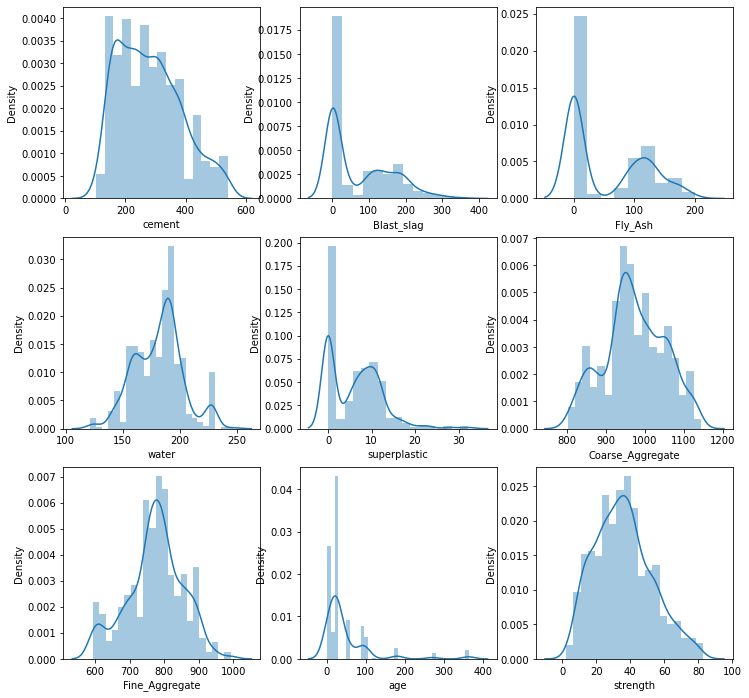

In [34]:
fig, ax2 = plt.subplots(3,3, figsize=(12,12))
sns.distplot(df['cement'], ax=ax2[0][0])
sns.distplot(df['Blast_slag'], ax=ax2[0][1])
sns.distplot(df['Fly_Ash'], ax=ax2[0][2])
sns.distplot(df['water'], ax=ax2[1][0])
sns.distplot(df['superplastic'], ax=ax2[1][1])
sns.distplot(df['Coarse_Aggregate'], ax=ax2[1][2])
sns.distplot(df['Fine_Aggregate'], ax=ax2[2][0])
sns.distplot(df['age'], ax=ax2[2][1])
sns.distplot(df['strength'], ax=ax2[2][2]);

Oberservation:-We can see that the curve looks closer to a Gaussian bell-shaped curve. Although, we should notice that we have a few observations that are going out of bounds and can be seen as noise. It points to another important conclusion that we should always expect some noise or outliers in our sample of data.

In [35]:
print('outlier in cement: ',df[((df.cement-df.cement.mean())/df.cement.std()).abs()>3]['cement'].count())
print('outlier in Blast_slag : ',df[((df.Blast_slag-df.Blast_slag.mean())/df.Blast_slag.std()).abs()>3]['Blast_slag'].count())
print('outlier in Fly_Ash : ',df[((df.Fly_Ash-df.Fly_Ash.mean())/df.Fly_Ash.std()).abs()>3]['Fly_Ash'].count())
print('outlier in water: ',df[((df.water-df.water.mean())/df.water.std()).abs()>3]['water'].count())
print('outlier in superplastic: ',df[((df.superplastic-df.superplastic.mean())/df.superplastic.std()).abs()>3]['superplastic'].count())
print('outlier in  Coarse_Aggregate: ',df[((df.Coarse_Aggregate-df.Coarse_Aggregate.mean())/df.Coarse_Aggregate.std()).abs()>3]['Coarse_Aggregate'].count())
print('outlier in Fine_Aggregate: ',df[((df.Fine_Aggregate-df.Fine_Aggregate.mean())/df.Fine_Aggregate.std()).abs()>3]['Fine_Aggregate'].count())
print('outlier in age: ',df[((df.age-df.age.mean())/df.age.std()).abs()>3]['age'].count())

outlier in cement:  0
outlier in Blast_slag :  4
outlier in Fly_Ash :  0
outlier in water:  2
outlier in superplastic:  10
outlier in  Coarse_Aggregate:  0
outlier in Fine_Aggregate:  0
outlier in age:  33


In [36]:
df.max()

cement               540.000000
Blast_slag           359.400000
Fly_Ash              200.100000
water                247.000000
superplastic          32.200000
Coarse_Aggregate    1145.000000
Fine_Aggregate       992.600000
age                  365.000000
strength              82.599225
dtype: float64

In [37]:
pd.melt(df, id_vars =['cement'], value_vars =['strength','Blast_slag'])

cement    variable       value
0      540.0    strength   79.986111
1      540.0    strength   61.887366
2      332.5    strength   40.269535
3      332.5    strength   41.052780
4      198.6    strength   44.296075
...      ...         ...         ...
2055   276.4  Blast_slag  116.000000
2056   322.2  Blast_slag    0.000000
2057   148.5  Blast_slag  139.400000
2058   159.1  Blast_slag  186.700000
2059   260.9  Blast_slag  100.500000

[2060 rows x 3 columns]

In [38]:
df.dtypes

cement              float64
Blast_slag          float64
Fly_Ash             float64
water               float64
superplastic        float64
Coarse_Aggregate    float64
Fine_Aggregate      float64
age                   int64
strength            float64
dtype: object

In [39]:
df.memory_usage()

Index                128
cement              8240
Blast_slag          8240
Fly_Ash             8240
water               8240
superplastic        8240
Coarse_Aggregate    8240
Fine_Aggregate      8240
age                 8240
strength            8240
dtype: int64

In [105]:
df[['strength','cement']].groupby(['strength']).describe().unstack()

               strength 
cement  count  2.331808     1.000000
               3.319827     1.000000
               4.565021     1.000000
               4.782206     1.000000
               4.827711     1.000000
                              ...   
        max    79.400056    1.044111
               79.986111    2.401994
               80.199848    0.408384
               81.751169    0.324837
               82.599225    1.044111
Length: 7504, dtype: float64

In [40]:
df.columns

Index(['cement', 'Blast_slag', 'Fly_Ash', 'water', 'superplastic',
       'Coarse_Aggregate', 'Fine_Aggregate', 'age', 'strength'],
      dtype='object')

# How to treat Outliers?

In [41]:
df.quantile(0.25)

cement              192.375000
Blast_slag            0.000000
Fly_Ash               0.000000
water               164.900000
superplastic          0.000000
Coarse_Aggregate    932.000000
Fine_Aggregate      730.950000
age                   7.000000
strength             23.707115
Name: 0.25, dtype: float64

In [42]:
df.quantile(0.75)

cement               350.000000
Blast_slag           142.950000
Fly_Ash              118.270000
water                192.000000
superplastic          10.160000
Coarse_Aggregate    1029.400000
Fine_Aggregate       824.000000
age                   56.000000
strength              46.136287
Name: 0.75, dtype: float64

In [43]:
list(enumerate(df.columns[:-1]))

[(0, 'cement'),
 (1, 'Blast_slag'),
 (2, 'Fly_Ash'),
 (3, 'water'),
 (4, 'superplastic'),
 (5, 'Coarse_Aggregate'),
 (6, 'Fine_Aggregate'),
 (7, 'age')]

In [44]:
Out=df.columns[:-1]

# What are Outliers? 
They are data records that differ dramatically from all others, they distinguish themselves in one or more characteristics. In other words, an outlier is a value that escapes normality and can (and probably will) cause anomalies in the results obtained through algorithms and analytical systems. There, they always need some degrees of attention.

Understanding the outliers is critical in analyzing data for at least two aspects:

The outliers may negatively bias the entire result of an analysis;
the behavior of outliers may be precisely what is being sought.
While working with outliers, many words can represent them depending on the context. Some other names are: Aberration, oddity, deviation, anomaly, eccentric, nonconformist, exception, irregularity, dissent, original and so on. Here are some common situations in which outliers arise in data analysis and suggest best approaches on how to deal with them in each case.

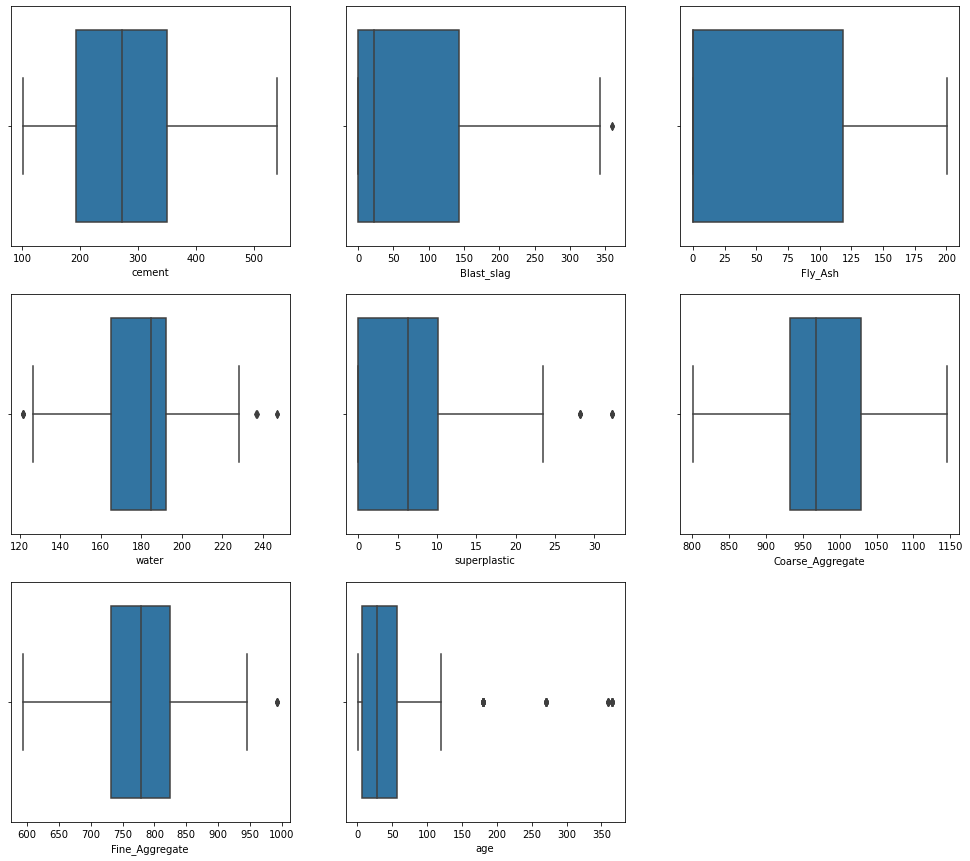

In [45]:
plt.figure(figsize=(17,15))
for i in enumerate(Out):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=df,x=i[1])

# There are Two Methods for Outlier Treatment
Interquartile Range(IQR) Method<br>
Z Score method

Data point that falls outside of 1.5 times of an Interquartile range above the 3rd quartile (Q3) and below the 1st quartile (Q1)


In [46]:
for i in Out:
    q1=df[i].quantile(0.01)
    q3=df[i].quantile(0.99)
    df[i][df[i]<q1]=q1
    df[i][df[i]>q3]=q3

<ipython-input-46-7c5b3697442c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]<q1]=q1
<ipython-input-46-7c5b3697442c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]>q3]=q3
<ipython-input-46-7c5b3697442c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]<q1]=q1
<ipython-input-46-7c5b3697442c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cave

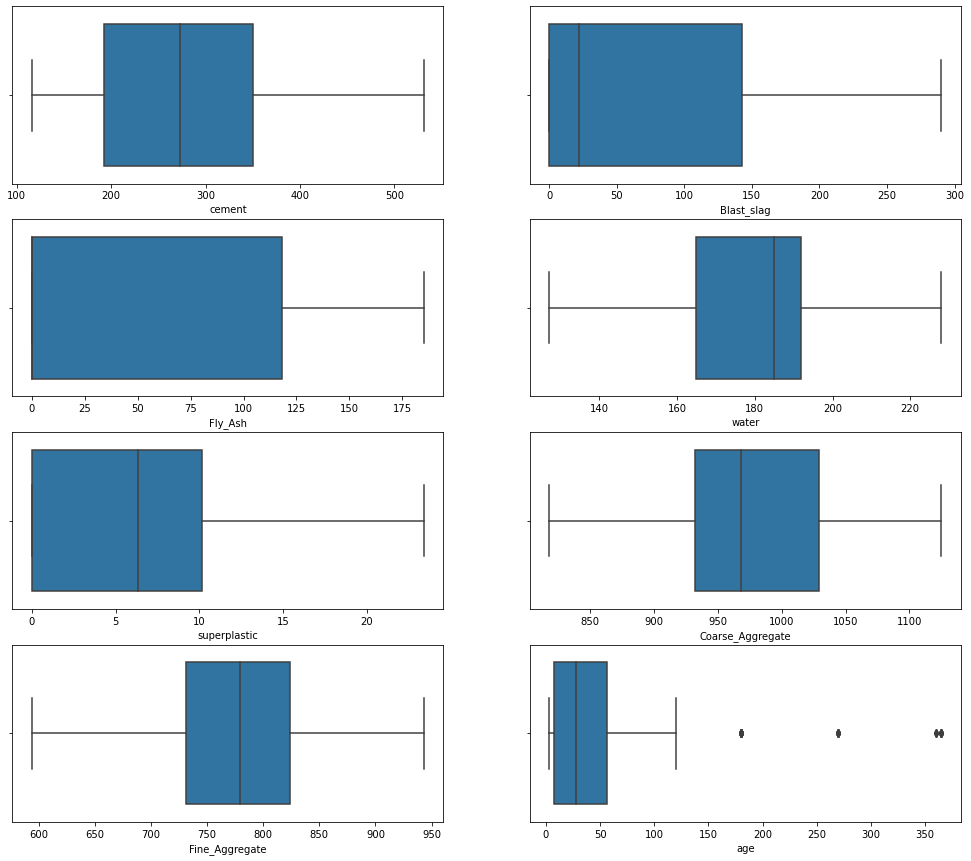

In [47]:
plt.figure(figsize=(17,15))
for i in enumerate(Out):
    plt.subplot(4,2,i[0]+1)
    sns.boxplot(data=df,x=i[1])

In [48]:
print('outlier in cement: ',df[((df.cement-df.cement.mean())/df.cement.std()).abs()>3]['cement'].count())
print('outlier in Blast_slag : ',df[((df.Blast_slag-df.Blast_slag.mean())/df.Blast_slag.std()).abs()>3]['Blast_slag'].count())
print('outlier in Fly_Ash : ',df[((df.Fly_Ash-df.Fly_Ash.mean())/df.Fly_Ash.std()).abs()>3]['Fly_Ash'].count())
print('outlier in water: ',df[((df.water-df.water.mean())/df.water.std()).abs()>3]['water'].count())
print('outlier in superplastic: ',df[((df.superplastic-df.superplastic.mean())/df.superplastic.std()).abs()>3]['superplastic'].count())
print('outlier in  Coarse_Aggregate: ',df[((df.Coarse_Aggregate-df.Coarse_Aggregate.mean())/df.Coarse_Aggregate.std()).abs()>3]['Coarse_Aggregate'].count())
print('outlier in Fine_Aggregate: ',df[((df.Fine_Aggregate-df.Fine_Aggregate.mean())/df.Fine_Aggregate.std()).abs()>3]['Fine_Aggregate'].count())
print('outlier in age: ',df[((df.age-df.age.mean())/df.age.std()).abs()>3]['age'].count())

outlier in cement:  0
outlier in Blast_slag :  0
outlier in Fly_Ash :  0
outlier in water:  0
outlier in superplastic:  15
outlier in  Coarse_Aggregate:  0
outlier in Fine_Aggregate:  0
outlier in age:  33


<AxesSubplot:>

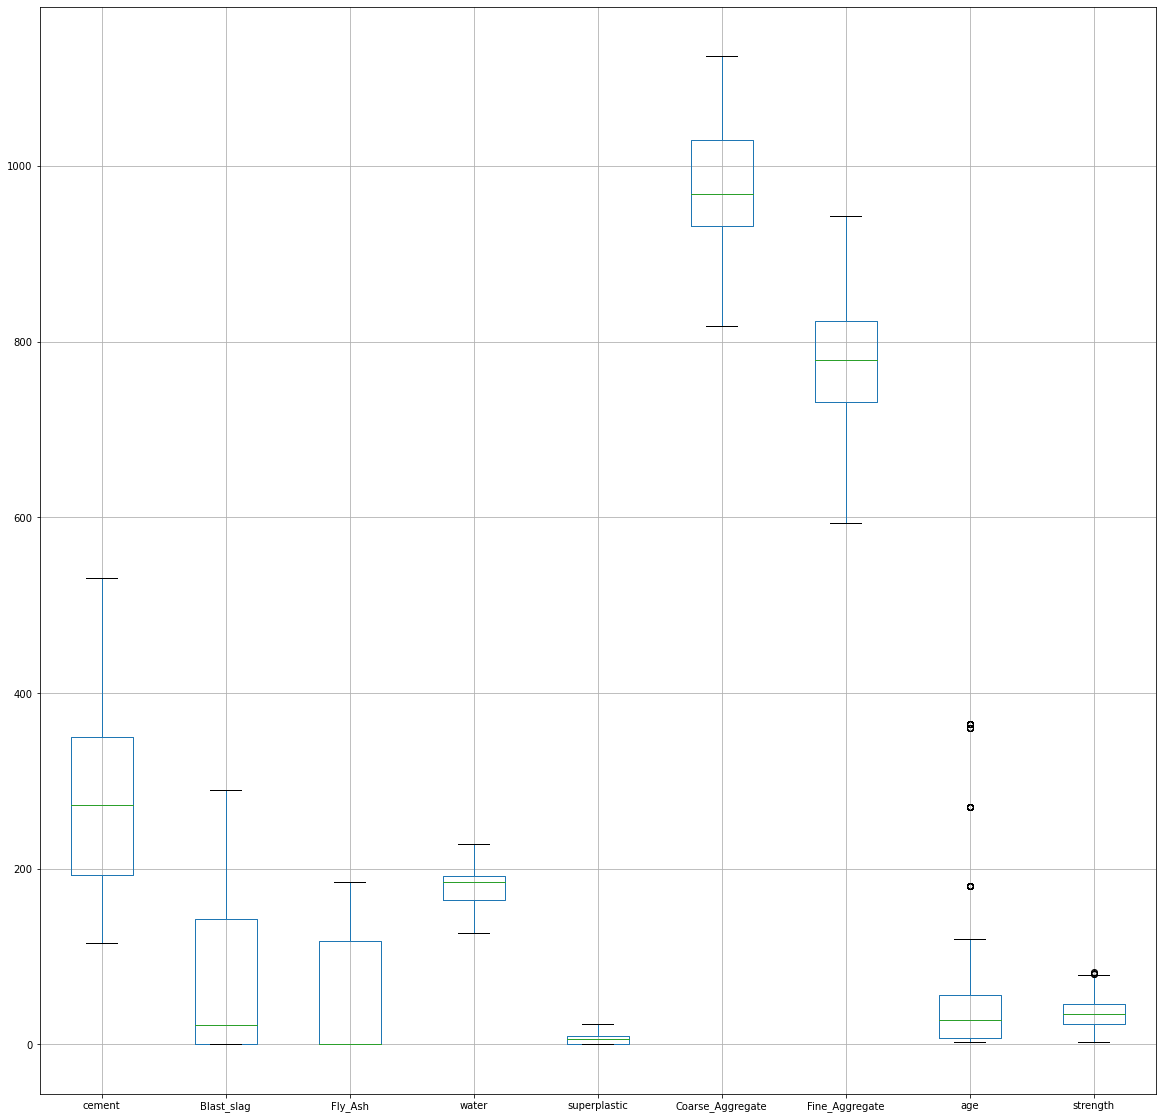

In [49]:
df.boxplot(figsize=(20,20))

C:\Users\Bhaskar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bhaskar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bhaskar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

<AxesSubplot:xlabel='strength', ylabel='Density'>

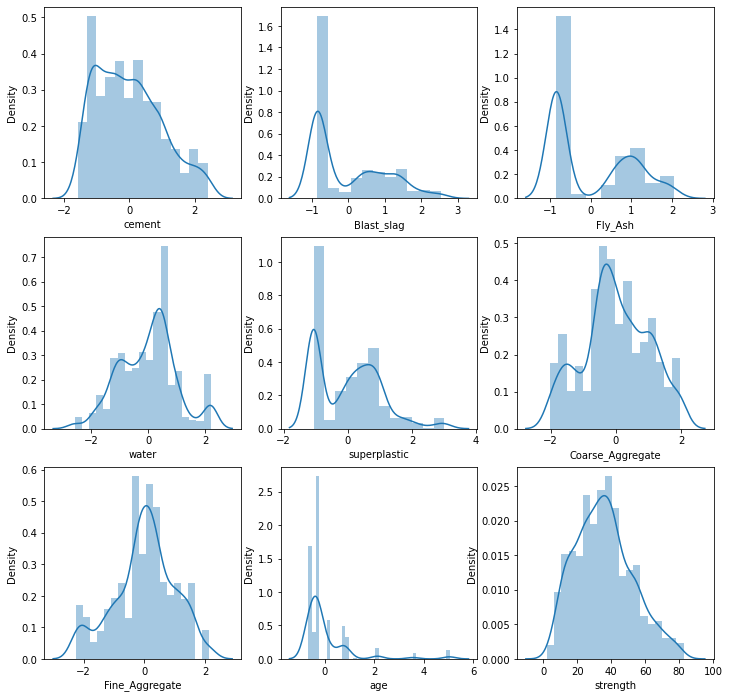

In [107]:
fig, ax2 = plt.subplots(3,3, figsize=(12,12))
sns.distplot(df['cement'], ax=ax2[0][0])
sns.distplot(df['Blast_slag'], ax=ax2[0][1])
sns.distplot(df['Fly_Ash'], ax=ax2[0][2])
sns.distplot(df['water'], ax=ax2[1][0])
sns.distplot(df['superplastic'], ax=ax2[1][1])
sns.distplot(df['Coarse_Aggregate'], ax=ax2[1][2])
sns.distplot(df['Fine_Aggregate'], ax=ax2[2][0])
sns.distplot(df['age'], ax=ax2[2][1])
sns.distplot(df['strength'], ax=ax2[2][2])

As we can see that the data in every column is not normally distributed so we have to normalize the data to get better result.

In [51]:
age_Q1 = df['age'].quantile(q=0.25)
age_Q3 = df['age'].quantile(q=0.75)

In [52]:
L_age_outliers = age_Q1-1.5*(age_Q3-age_Q1)
U_age_outliers = age_Q3+1.5*(age_Q3-age_Q1)
print('Lower outlier in age', L_age_outliers)
print('Upper outlier in age', U_age_outliers)

Lower outlier in age -66.5
Upper outlier in age 129.5


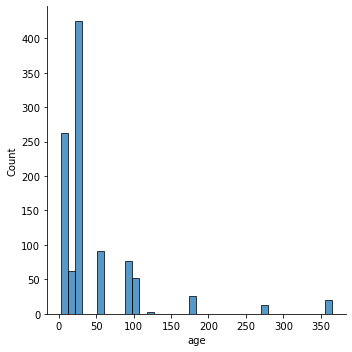

In [53]:
sns.displot(df.age)

C:\Users\Bhaskar\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Bhaskar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Blast_slag'>

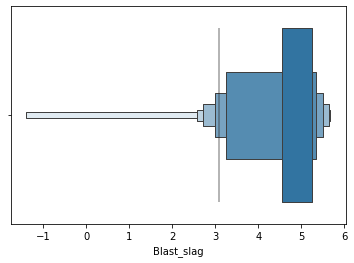

In [54]:
sns.boxenplot(np.log(df['Blast_slag']))

In [55]:
df.columns

Index(['cement', 'Blast_slag', 'Fly_Ash', 'water', 'superplastic',
       'Coarse_Aggregate', 'Fine_Aggregate', 'age', 'strength'],
      dtype='object')

C:\Users\Bhaskar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

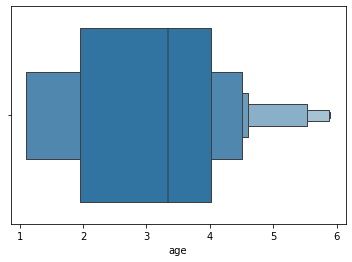

In [56]:
sns.boxenplot(np.log(df.age))

In [57]:
water_Q1 = df['water'].quantile(q=0.25)
water_Q3 = df['water'].quantile(q=0.75)

In [58]:
L_water_outliers = age_Q1-1.5*(water_Q3-water_Q1)
U_water_outliers = age_Q3+1.5*(water_Q3-water_Q1)
print('Lower outlier in water', L_age_outliers)
print('Upper outlier in water', U_water_outliers)

Lower outlier in water -66.5
Upper outlier in water 96.64999999999999


C:\Users\Bhaskar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='water', ylabel='Density'>

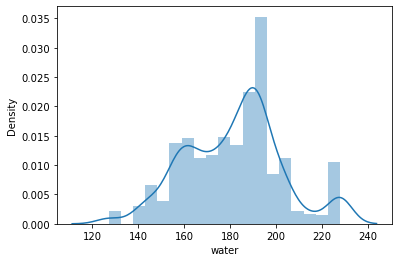

In [59]:
sns.distplot(df.water)

In [60]:
superplastic_Q1 = df['superplastic'].quantile(q=0.25)
superplastic_Q3 = df['superplastic'].quantile(q=0.75)

In [61]:
L_superplastic_outliers = superplastic_Q1-1.5*(superplastic_Q3-superplastic_Q1)
U_superplastic_outliers = superplastic_Q3+1.5*(superplastic_Q3-superplastic_Q1)
print('Lower outlier in superplastic', L_superplastic_outliers)
print('Upper outlier in superplastic', U_superplastic_outliers)

Lower outlier in superplastic -15.24
Upper outlier in superplastic 25.4


C:\Users\Bhaskar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='superplastic', ylabel='Density'>

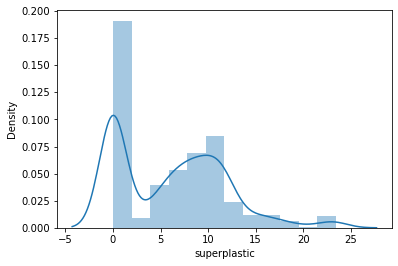

In [62]:
sns.distplot(df.superplastic)

In [63]:
df.columns

Index(['cement', 'Blast_slag', 'Fly_Ash', 'water', 'superplastic',
       'Coarse_Aggregate', 'Fine_Aggregate', 'age', 'strength'],
      dtype='object')

In [130]:
def numeric_analysis_hist(feature):
    sns.set_style('whitegrid')    
    plt.figure(figsize=(15,5))
    plt.title(feature+' Distribution',fontsize = 20) 
    plt.xlabel(feature , fontsize = 15)  
    
    dist = sns.distplot(df[feature],color='yellow')

C:\Users\Bhaskar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


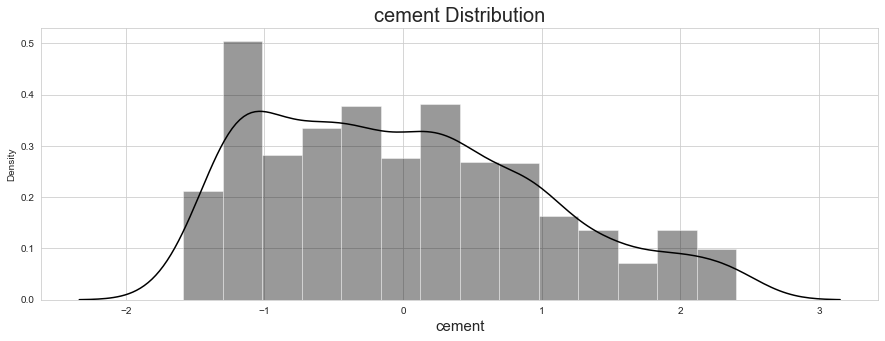

In [115]:
numeric_analysis_hist('cement')

C:\Users\Bhaskar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


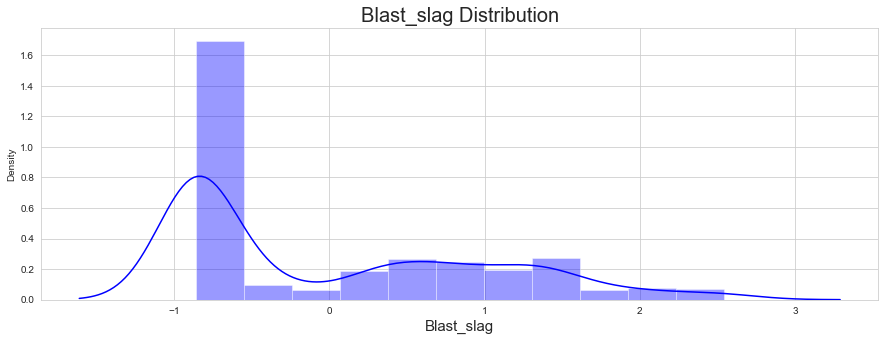

In [123]:
numeric_analysis_hist('Blast_slag')

C:\Users\Bhaskar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


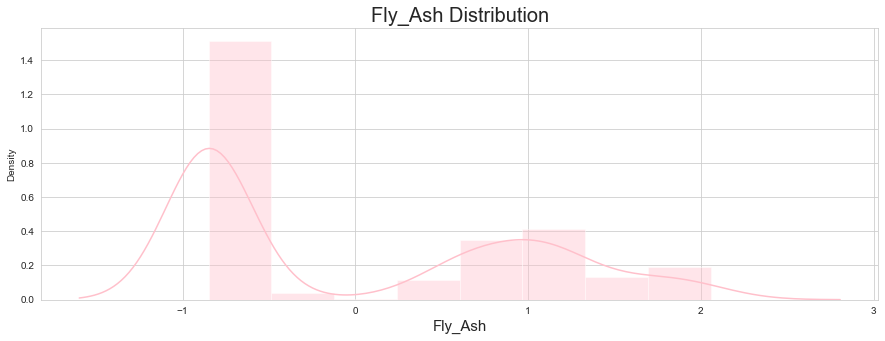

In [125]:
numeric_analysis_hist('Fly_Ash')

C:\Users\Bhaskar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


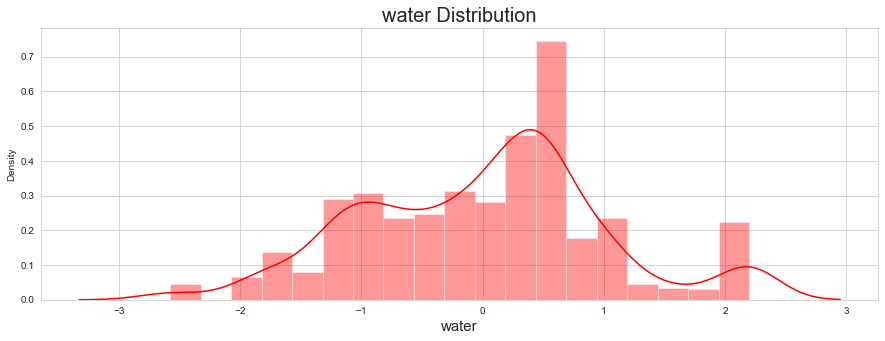

In [127]:
numeric_analysis_hist('water')

C:\Users\Bhaskar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


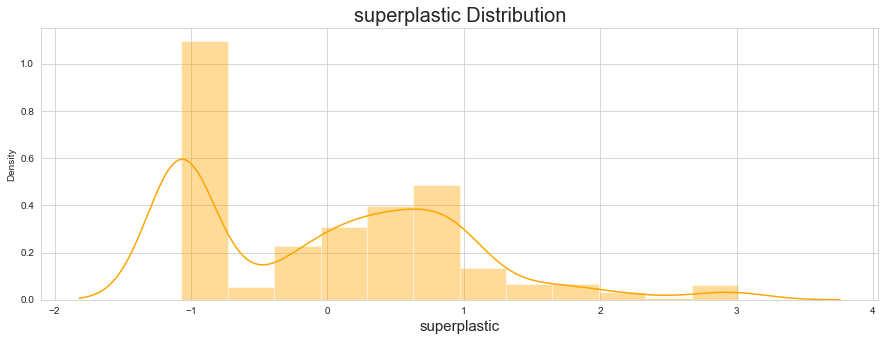

In [129]:
numeric_analysis_hist('superplastic')

C:\Users\Bhaskar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


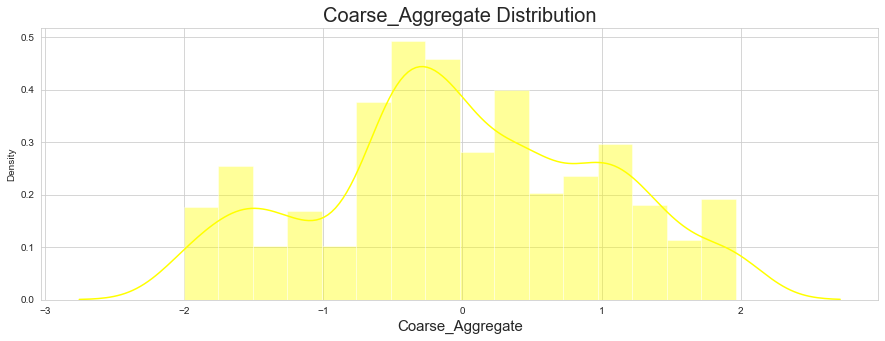

In [131]:
numeric_analysis_hist('Coarse_Aggregate')

In [116]:
df.columns

Index(['cement', 'Blast_slag', 'Fly_Ash', 'water', 'superplastic',
       'Coarse_Aggregate', 'Fine_Aggregate', 'age', 'strength'],
      dtype='object')

The heatmap is a way of representing the data in a 2-dimensional form. The data values are represented as colors in the graph. The goal of the heatmap is to provide a colored visual summary of information.

<AxesSubplot:>

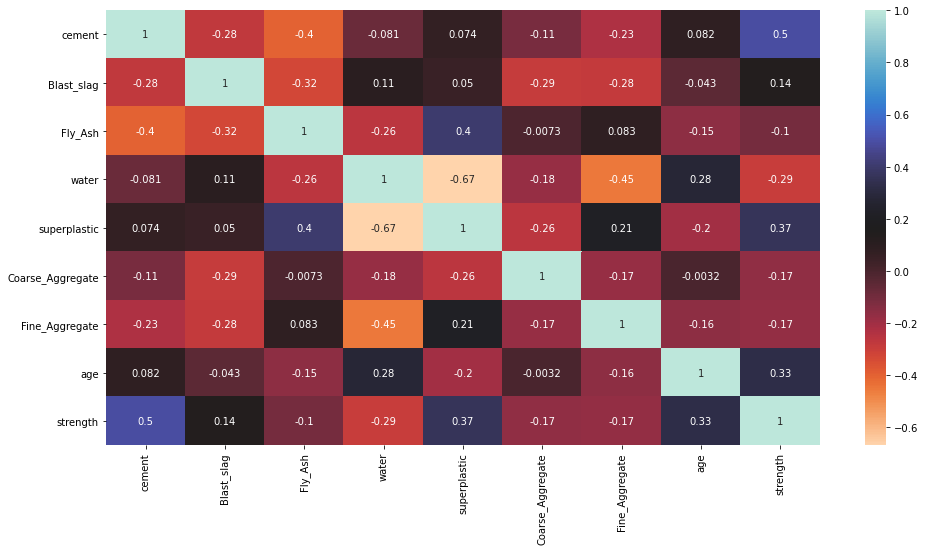

In [64]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True,cmap='icefire_r')

In [65]:
corr=df.corr()
corr

cement  Blast_slag   Fly_Ash     water  superplastic  \
cement            1.000000   -0.275617 -0.398314 -0.081077      0.073537   
Blast_slag       -0.275617    1.000000 -0.324447  0.106573      0.049729   
Fly_Ash          -0.398314   -0.324447  1.000000 -0.260639      0.402987   
water            -0.081077    0.106573 -0.260639  1.000000     -0.668060   
superplastic      0.073537    0.049729  0.402987 -0.668060      1.000000   
Coarse_Aggregate -0.111211   -0.289455 -0.007321 -0.178989     -0.260443   
Fine_Aggregate   -0.225076   -0.282066  0.083389 -0.447568      0.212010   
age               0.081821   -0.043160 -0.154499  0.281054     -0.199144   
strength          0.497087    0.137451 -0.104478 -0.292506      0.366141   

                  Coarse_Aggregate  Fine_Aggregate       age  strength  
cement                   -0.111211       -0.225076  0.081821  0.497087  
Blast_slag               -0.289455       -0.282066 -0.043160  0.137451  
Fly_Ash                  -0.007321        0.083389 -0.154499 -0.104478  
water                    -0.178989       -0.447568  0.281054 -0.292506  
superplastic             -0.260443        0.212010 -0.199144  0.366141  
Coarse_Aggregate          1.000000       -0.173946 -0.003236 -0.166010  
Fine_Aggregate           -0.173946        1.000000 -0.156911 -0.171110  
age                      -0.003236       -0.156911  1.000000  0.328794  
strength                 -0.166010       -0.171110  0.328794  1.000000

water is highly correlated with superplastic	     -------                            High correlation<br>
superplastic is highly correlated with water	     -------                           High correlation<br>
water is highly correlated with superplastic	            ------                     High correlation<br>
superplastic is highly correlated with water	            ------                    High correlation<br>
age is highly correlated with strength	                    ------ ----------------                  High correlation<br>
strength is highly correlated with age	                     ------ --------------                 High correlation<br>
water is highly correlated with superplastic	            -------  ----------------------                  High correlation<br>
superplastic is highly correlated with water	             -------  ---------------                 High correlation<br>
superplastic is highly correlated with Coarse_Aggregate and 5 other fields--------------------	   High correlation<br>
Coarse_Aggregate is highly correlated with superplastic and 5 other fields---------------------	   High correlation<br>
Blast_slag is highly correlated with superplastic and 4 other fields---------------------	     High correlation<br>
water is highly correlated with superplastic and 5 other fields	    -------------------------          High correlation<br>
cement is highly correlated with superplastic and 6 other fields	       --------------------     High correlation<br>
Fine_Aggregate is highly correlated with superplastic and 5 other fields  ----------------------	   High correlation<br>
strength is highly correlated with water and 1 other fields	            -----------------------       High correlation<br>
Fly_Ash is highly correlated with superplastic and 3 other fields	     -----------------------        High correlation<br>
Blast_slag has 466 (45.2%) zeros 	                                    -------------------------         Zeros<br>
Fly_Ash has 566 (55.0%) zeros 	                                         ----------------------------        Zeros<br>
superplastic has 379 (36.8%) zeros 	                                     -----------------------------        Zeros

# The Pearson's correlation coefficient (r) is a measure of linear correlation between two variables. It's value lies between -1 and +1, -1 indicating total negative linear correlation, 0 indicating no linear correlation and 1 indicating total positive linear correlation. Furthermore, r is invariant under separate changes in location and scale of the two variables, implying that for a linear function the angle to the x-axis does not affect r.

To calculate r for two variables X and Y, one divides the covariance of X and Y by the product of their standard deviations.

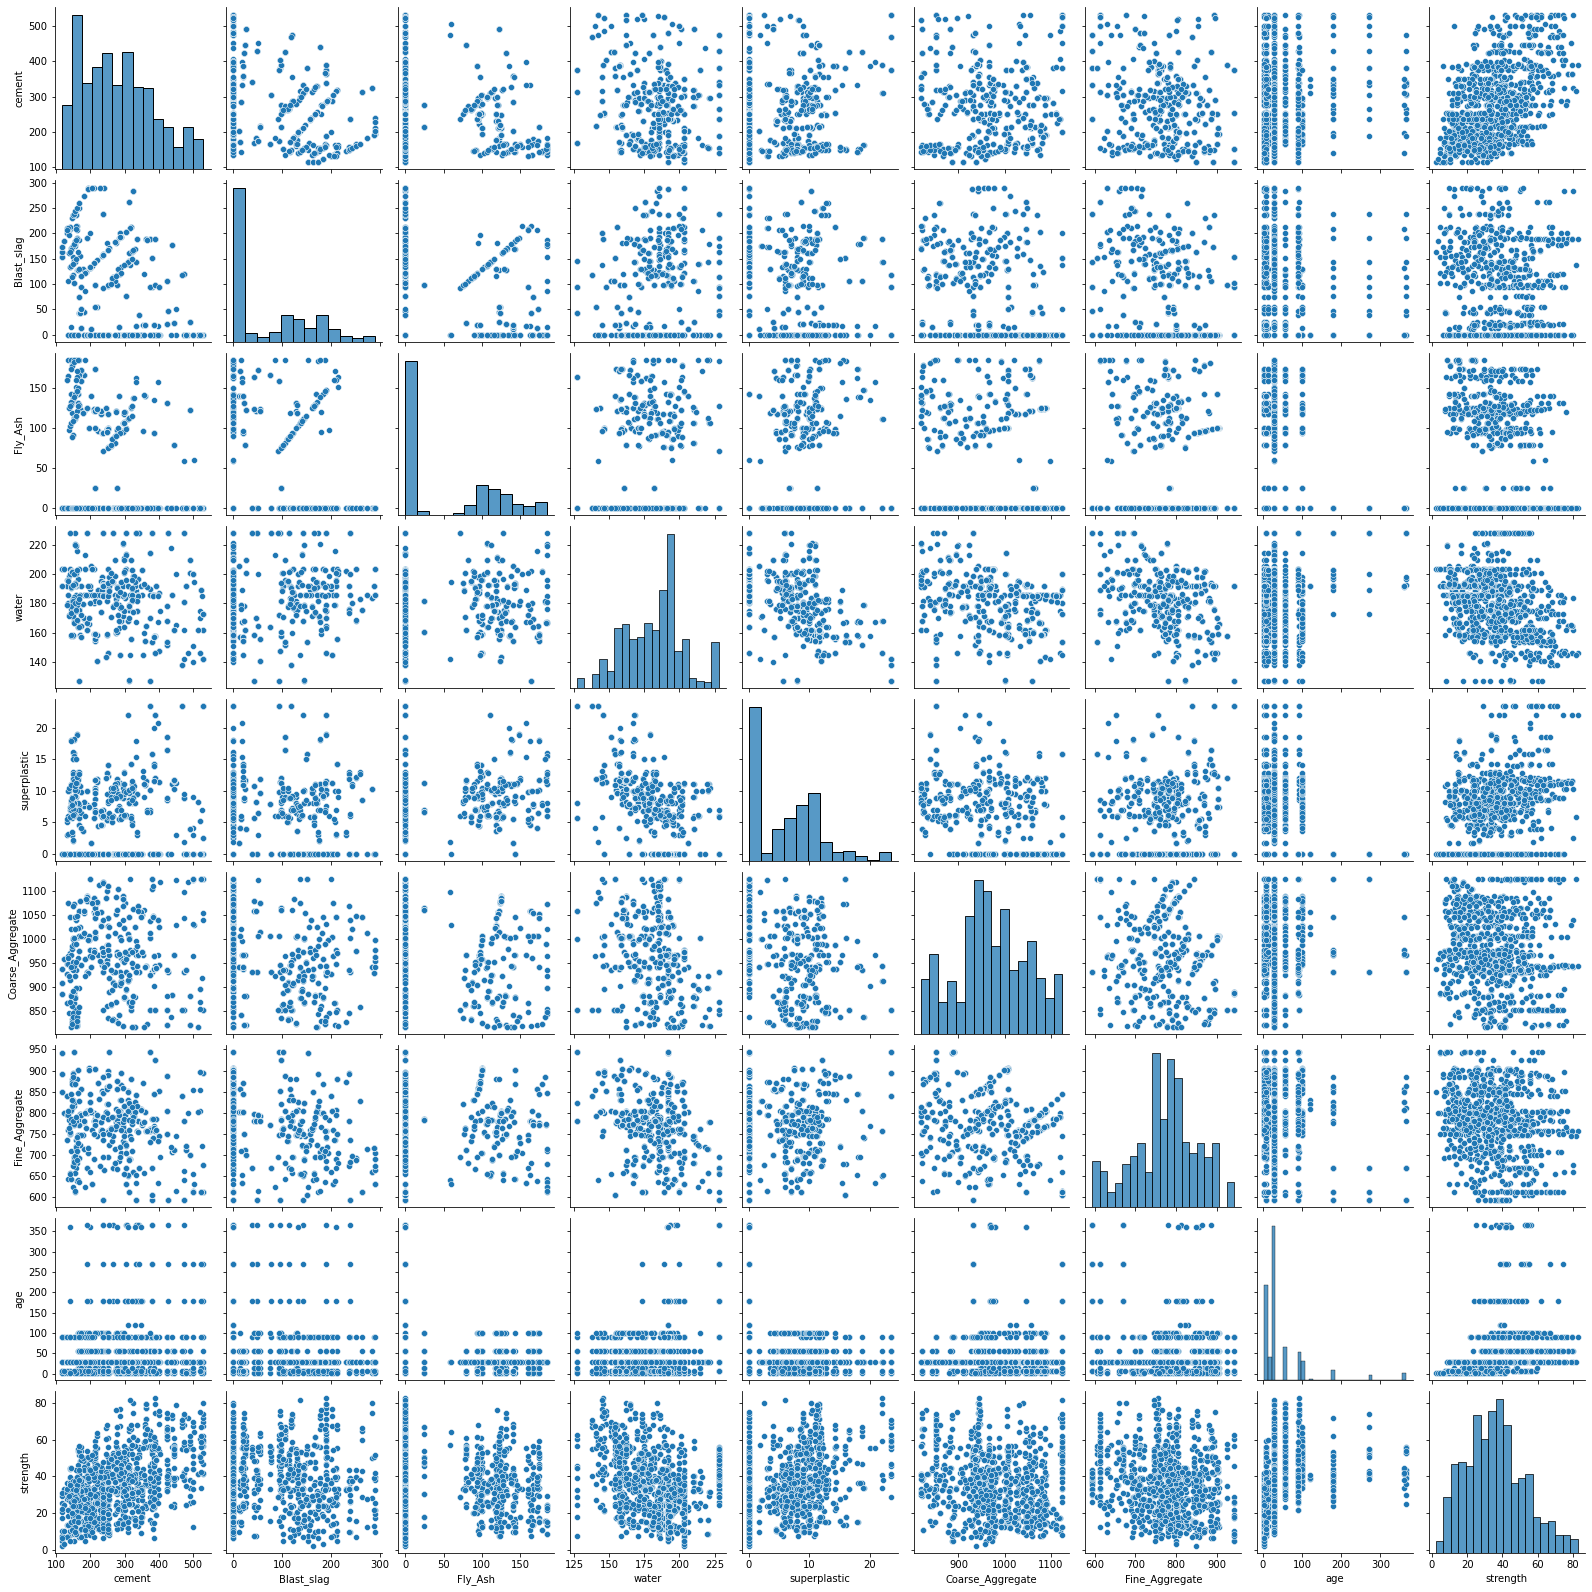

In [66]:
sns.pairplot(df)

A pairs plot allows us to see both distribution of single variables and relationships between two variables. Pair plots are a great method to identify trends for follow-up analysis and, fortunately, are easily implemented in Python!

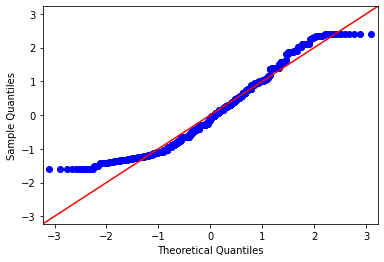

In [68]:
 import statsmodels.api as sm
import scipy.stats as norm
import pylab
sm.qqplot(df['cement'],line='45')
pylab.show()

# We have to normalize the data

In [67]:
scaler=StandardScaler()
df[["cement","Blast_slag","Fly_Ash",'water','superplastic','Coarse_Aggregate','Fine_Aggregate','age']]=scaler.fit_transform(df[["cement","Blast_slag","Fly_Ash",'water','superplastic','Coarse_Aggregate','Fine_Aggregate','age']])

StandardScaler removes the mean and scales each feature/variable to unit variance. This operation is performed feature-wise in an independent way. StandardScaler can be influenced by outliers (if they exist in the dataset) since it involves the estimation of the empirical mean and standard deviation of each feature.

In [69]:
df.columns

Index(['cement', 'Blast_slag', 'Fly_Ash', 'water', 'superplastic',
       'Coarse_Aggregate', 'Fine_Aggregate', 'age', 'strength'],
      dtype='object')

In [70]:
df.head()

cement  Blast_slag   Fly_Ash     water  superplastic  Coarse_Aggregate  \
0  2.401994   -0.862559 -0.848265 -0.924736     -0.634241          0.866884   
1  2.401994   -0.862559 -0.848265 -0.924736     -0.634241          1.060871   
2  0.492891    0.808580 -0.848265  2.198616     -1.070194         -0.529821   
3  0.492891    0.808580 -0.848265  2.198616     -1.070194         -0.529821   
4 -0.792968    0.690135 -0.848265  0.494969     -1.070194          0.070245   

   Fine_Aggregate       age   strength  
0       -1.223743 -0.279807  79.986111  
1       -1.223743 -0.279807  61.887366  
2       -2.254728  3.553155  40.269535  
3       -2.254728  5.057830  41.052780  
4        0.655917  4.978637  44.296075

# We are going to Perform below algorithms:<br>
- Linear Regression<br>
- Lasso Regression<br>
- Ridge Regression<br>
- Decision Tree Regressor<br>
- Random Forest Regressor<br>
- KNN Regressor<br>
- SVM Regressor<br>

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
x=df.drop('strength',axis=1)
y=df['strength']

In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, train_size=0.7, test_size=0.3, random_state=100)

The train-test split is a technique for evaluating the performance of a machine learning algorithm. It can be used for classification or regression problems and can be used for any supervised learning algorithm. The procedure involves taking a dataset and dividing it into two subsets

In [74]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((721, 8), (309, 8), (721,), (309,))

# Linear Regression:

Linear regression is a statistical regression method which is used for predictive analysis.
It is one of the very simple and easy algorithms which works on regression and shows the relationship between the continuous variables.
It is used for solving the regression problem in machine learning.

In [75]:
Linear=LinearRegression()

In [76]:
Linear.fit(x_train,y_train)

LinearRegression()

# Why do we use Fit?
In statistics, a fit refers to how well you approximate a target function. This is good terminology to use in machine learning, because supervised machine learning algorithms seek to approximate the unknown underlying mapping function for the output variables given the input variables.

In [77]:
y_pred = Linear.predict(x_train)

<AxesSubplot:xlabel='cement', ylabel='strength'>

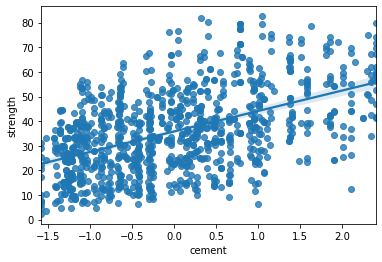

In [79]:
sns.regplot(x='cement',y='strength',data=df)

<AxesSubplot:xlabel='Blast_slag', ylabel='strength'>

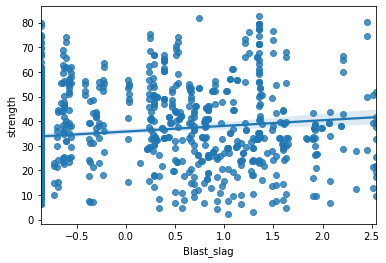

In [81]:
sns.regplot(x='Blast_slag',y='strength',data=df)

<AxesSubplot:xlabel='Fly_Ash', ylabel='strength'>

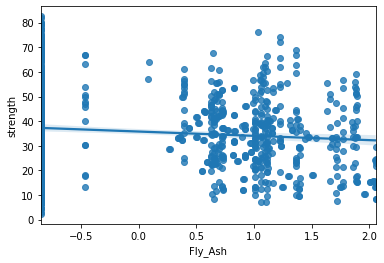

In [82]:
sns.regplot(x='Fly_Ash',y='strength',data=df)

In [80]:
df.columns

Index(['cement', 'Blast_slag', 'Fly_Ash', 'water', 'superplastic',
       'Coarse_Aggregate', 'Fine_Aggregate', 'age', 'strength'],
      dtype='object')

C:\Users\Bhaskar\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1152x1152 with 0 Axes>

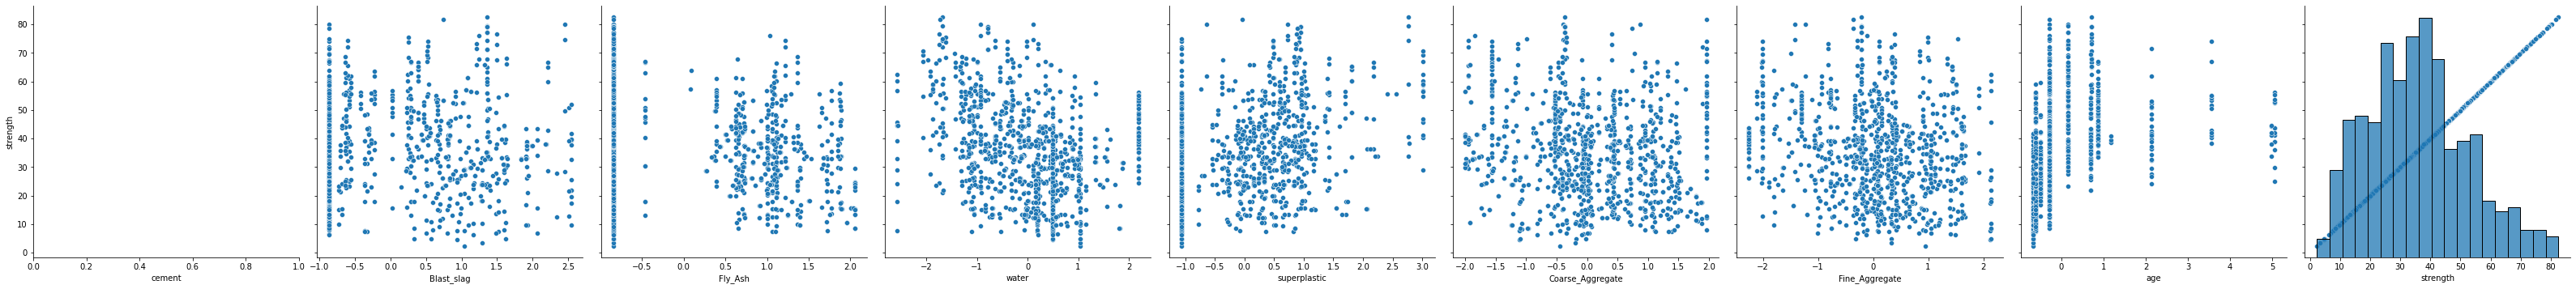

In [88]:
plt.figure(figsize=(16,16))
sns.pairplot(data=df,x_vars=['cement', 'Blast_slag', 'Fly_Ash', 'water', 'superplastic',
       'Coarse_Aggregate', 'Fine_Aggregate', 'age', 'strength'],y_vars='strength',size=5,aspect=1)

In [90]:
Linear.coef_

array([12.97824453,  8.65960932,  5.94407174, -2.22088772,  2.29267014,
        1.95330549,  2.0690162 ,  6.87235535])

In [91]:
Linear.intercept_

35.816396127737676

In [97]:
y=12.97*10-35.81
y

93.89000000000001

C:\Users\Bhaskar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


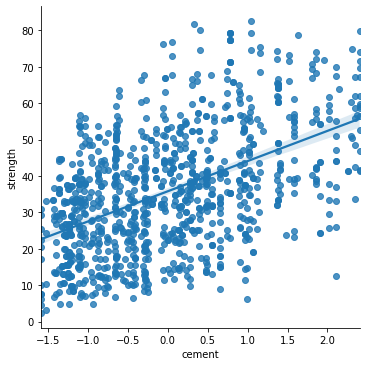

In [95]:
sns.lmplot('cement','strength',df)

In [99]:
correlation=df.corr()

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0, 0.5, 'cement'),
  Text(0, 1.5, 'Blast_slag'),
  Text(0, 2.5, 'Fly_Ash'),
  Text(0, 3.5, 'water'),
  Text(0, 4.5, 'superplastic'),
  Text(0, 5.5, 'Coarse_Aggregate'),
  Text(0, 6.5, 'Fine_Aggregate'),
  Text(0, 7.5, 'age'),
  Text(0, 8.5, 'strength')])

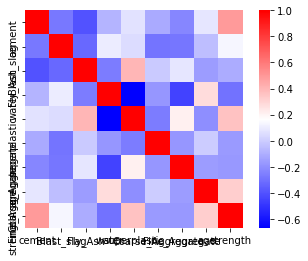

In [101]:
sns.heatmap(data=correlation,square=True,cmap="bwr")
plt.xticks(rotation=0)
plt.yticks(rotation=90)  

In [153]:
score=Linear.score(x_train,y_train)
score

0.6083433383304215

In [156]:
def gen_poly(model_name,model,x_train,x_test,y_train,y_test):
    y_train_pre=Linear.predict(x_train)
    rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
    resqr=round(r2_score(y_train,y_train_pre)*100,2)
    
    print("ModelName",model_name)
    print('-'*40)
    print('RMSE is :',rmse)
    print('R-SQR is :' ,str(resqr)+'%')
    print('\n')
    
    y_train_pre=Linear.predict(x_test)
    rmse=np.sqrt(mean_squared_error(y_test,y_train_pre))
    resqr=round(r2_score(y_test,y_train_pre)*100,2)
    
    print("ModelName",model_name)
    print('-'*40)
    print('RMSE is :',rmse)
    print('R-SQR is :' ,str(resqr)+'%')

In [157]:
gen_poly('LinearRegression',score,x_train,x_test,y_train,y_test)

ModelName LinearRegression
----------------------------------------
RMSE is : 10.238688966441261
R-SQR is : 60.83%


ModelName LinearRegression
----------------------------------------
RMSE is : 10.507615831516668
R-SQR is : 63.78%


In [63]:
result_1 = pd.DataFrame({'Algorithm':['Random Forest'],'accuracy':score},index={'1'})
results = result_1[['Algorithm','accuracy']]                         
results

Algorithm  accuracy
1  Random Forest  0.608343

Here i got around 63% accuarcy in test dataset and in the training dataset i am getting around 60% accuracy and they are not so significant different and they are not same .We got around 1% difference between each other.


In [64]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier


# Random Forest
is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

In [65]:
ran=RandomForestRegressor(random_state=42)

In [66]:
df.head()

cement  Blast_slag   Fly_Ash     water  superplastic  Coarse_Aggregate  \
0  2.401994   -0.862559 -0.848265 -0.924736     -0.634241          0.866884   
1  2.401994   -0.862559 -0.848265 -0.924736     -0.634241          1.060871   
2  0.492891    0.808580 -0.848265  2.198616     -1.070194         -0.529821   
3  0.492891    0.808580 -0.848265  2.198616     -1.070194         -0.529821   
4 -0.792968    0.690135 -0.848265  0.494969     -1.070194          0.070245   

   Fine_Aggregate       age   strength  
0       -1.223743 -0.279807  79.986111  
1       -1.223743 -0.279807  61.887366  
2       -2.254728  3.553155  40.269535  
3       -2.254728  5.057830  41.052780  
4        0.655917  4.978637  44.296075

In [67]:
ran.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [68]:
x_train.head()

cement  Blast_slag   Fly_Ash     water  superplastic  Coarse_Aggregate  \
282 -0.286211   -0.862559  1.006232  0.326971      0.037127          0.716868   
599  0.555312   -0.862559 -0.848265  0.731587     -1.070194         -0.064253   
252 -0.299367   -0.862559  0.652173  0.278227     -0.105866         -0.208320   
193 -0.454842   -0.862559  0.634768  0.773705     -0.273795         -0.335317   
644  0.660946   -0.862559 -0.848265  0.211028     -1.070194          0.996209   

     Fine_Aggregate       age  
282       -0.196154  0.163677  
599        0.096419 -0.612419  
252        1.104395  0.163677  
193        0.991113  0.860579  
644       -0.041883 -0.279807

In [69]:
y_train.shape

(721,)

In [70]:
y_pred = ran.predict(x_test)

In [71]:
ran.score(x_train,y_train)

0.9866021404288595

In [72]:
ran.score(x_test,y_test)

0.8987273121532734

In [73]:
from sklearn.metrics import r2_score,precision_score,mean_squared_error

In [74]:
accuracy_score=r2_score(y_test,y_pred)
accuracy_score

0.8987273121532734

In [75]:
np.sqrt(mean_squared_error(y_test,y_pred))

5.556033691145433

In [76]:
result_1 = pd.DataFrame({'Algorithm':['Random Forest'],'accuracy':accuracy_score},index={'1'})
results = result_1[['Algorithm','accuracy']]                         
results 

Algorithm  accuracy
1  Random Forest  0.898727

Here i got around 89% accuarcy.Here our Model is Performing the very good.
but here we are not using any cross-validation. Let's see in next step.

I created a DataFrame to understand.

# What Is K-Fold Cross Validation?
Home › Uncategorized › What Is K-Fold Cross Validation?
Harshita Srivastava
What Is K-Fold Cross Validation?
BY HARSHITA SRIVASTAVA ON DECEMBER 8, 2017 IN UNCATEGORIZED
K-Fold Cross Validation -magoosh
Cross Validation is a very important technique that is used widely by data scientists. The problem with machine learning models is that you won’t get to know how well a model performs until you test its performance on an independent data set (the data set which was not used for training the machine learning model).

Cross Validation comes to the rescue here and helps you estimate the performance of your model. One type of cross validation is the K-Fold Cross Validation. Keep reading to learn more!

What is Cross Validation?
Cross Validation is a very useful technique for assessing the performance of machine learning models. It helps in knowing how the machine learning model would generalize to an independent data set. You want to use this technique to estimate how accurate the predictions your model will give in practice.

When you are given a machine learning problem, you will be given two type of data sets — known data (training data set) and unknown data (test data set). By using cross validation, you would be “testing” your machine learning model in the “training” phase to check for overfitting and to get an idea about how your machine learning model will generalize to independent data, which is the test data set given in the problem.

In one round of cross validation, you will have to divide your original training data set into two parts:

Cross validation training set
Cross validation testing set or Validation set
You will train your machine learning model on the cross validation training set and test the model’s predictions against the validation set. You will get to know how accurate your machine learning model’s predictions are when you compare the model’s predictions on the validation set and the actual labels of the data points in the validation set.

For reducing the variance, several rounds of cross validation are performed by using different cross validation training sets and cross validation testing sets. The results from all the rounds are averaged to estimate the accuracy of the machine learning model.

K-Fold Cross Validation
K-Fold Cross Validation is a common type of cross validation that is widely used in machine learning.

K-fold cross validation is performed as per the following steps:

Partition the original training data set into k equal subsets. Each subset is called a fold. Let the folds be named as f1, f2, …, fk .
For i = 1 to i = k
Keep the fold fi as Validation set and keep all the remaining k-1 folds in the Cross validation training set.
Train your machine learning model using the cross validation training set and calculate the accuracy of your model by validating the predicted results against the validation set.
Estimate the accuracy of your machine learning model by averaging the accuracies derived in all the k cases of cross validation.
In the k-fold cross validation method, all the entries in the original training data set are used for both training as well as validation. Also, each entry is used for validation just once.

Generally, the value of k is taken to be 10, but it is not a strict rule, and k can take any value.



In [77]:
kf=KFold(n_splits=10)
kf


KFold(n_splits=10, random_state=None, shuffle=False)

In [78]:
result_01=cross_val_score(ran,x,y,cv=kf)
print(result_01)
print(np.mean(result_01))

[0.51138224 0.65284894 0.74159527 0.60650045 0.57984832 0.71531241
 0.85483811 0.814358   0.93515797 0.93664793]
0.7348489654330268


# Why we are using Hyper-Parameter in machine learning?

Parameters are key to machine learning algorithms. They are the part of the model that is learned from historical training data. In classical machine learning literature, we may think of the model as the hypothesis and the parameters as the tailoring of the hypothesis to a specific set of data.

In [79]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [100, 120, 150, 120,200]
max_features = ['auto', 'sqrt']
max_depth =  [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]


In [81]:
random_grid ={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [83]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = ran,param_distributions = random_grid,  n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = -1)


In [84]:
rf_random.fit(x_train,y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 120, 150, 120,
                                                         200]},
                   random_state=42, verbose=2)

In [85]:
rf_random.best_params_

{'n_estimators': 150,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': False}

-----------------These are the best parameters for the RandomForest Algorithms---------------------------

In [86]:
Ran_KFold=rf_random.best_score_
Ran_KFold

0.9049978970375004

In [87]:
random_re = pd.DataFrame({'Algorithm':['Random Forest K_fold'],'accuracy':90.49},index={'2'})
results = pd.concat([results,random_re])
results = results[['Algorithm','accuracy']]
results

Algorithm   accuracy
1         Random Forest   0.898727
2  Random Forest K_fold  90.490000

Here i got around 90.49% accuarcy.Here our Model is increased. 

In [88]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

# LASSO ALGORITHMS

Lasso (Least Absolute Shrinkage and Selection Operator) regression is another widely used linear ML regression (one input variable). The sum of coefficient values is penalized in lasso regression to avoid prediction errors. The determination coefficients in lasso regression are reduced towards zero by using the technique ‘shrinkage’

In [89]:
losso=Lasso()      #lasso parameter is alpha

In [90]:
losso=losso.fit(x_train,y_train)

In [91]:
y_train_pre=losso.predict(x_test)

In [92]:
alpha=[0.1,0.2,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10]
for i in alpha:
    lasso=Lasso(alpha=i)
    lasso.fit(x_train,y_train)
    y_train_pre=lasso.predict(x_train)
    print("alpha values of",i)
    print("--------Evalution metrics of training data set-------")
    rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
    resqr=round(r2_score(y_train,y_train_pre)*100,2)
    
    print("ModelName-Lasso")
    print('-'*40)
    print('RMSE is :',rmse)
    print('R-SQR is :' ,str(resqr)+'%')
    print('\n')
    
    y_train_pre=lasso.predict(x_test)
    rmse=np.sqrt(mean_squared_error(y_test,y_train_pre))
    resqr=round(r2_score(y_test,y_train_pre)*100,2)
    
    print("ModelName-model_name")
    print('-'*40)
    print('RMSE is :',rmse)
    print('R-SQR is :' ,str(resqr)+'%')

alpha values of 0.1
--------Evalution metrics of training data set-------
ModelName-Lasso
----------------------------------------
RMSE is : 10.276156918146464
R-SQR is : 60.55%


ModelName-model_name
----------------------------------------
RMSE is : 10.549314371362295
R-SQR is : 63.49%
alpha values of 0.2
--------Evalution metrics of training data set-------
ModelName-Lasso
----------------------------------------
RMSE is : 10.299989501343717
R-SQR is : 60.36%


ModelName-model_name
----------------------------------------
RMSE is : 10.609714011976509
R-SQR is : 63.07%
alpha values of 0.2
--------Evalution metrics of training data set-------
ModelName-Lasso
----------------------------------------
RMSE is : 10.299989501343717
R-SQR is : 60.36%


ModelName-model_name
----------------------------------------
RMSE is : 10.609714011976509
R-SQR is : 63.07%
alpha values of 0.3
--------Evalution metrics of training data set-------
ModelName-Lasso
----------------------------------------
RM

In [93]:
random_re = pd.DataFrame({'Algorithm':['Lasso'],'accuracy':63.07},index={'3'})
results = pd.concat([results,random_re])
results = results[['Algorithm','accuracy']]
results

Algorithm   accuracy
1         Random Forest   0.898727
2  Random Forest K_fold  90.490000
3                 Lasso  63.070000

Here I got 63% accuracy. This Algorithm is not performing well. 
Let's Ridge

In [94]:
alpha=[0.1,0.2,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10]
for i in alpha:
    ridge=Ridge(alpha=i)
    ridge.fit(x_train,y_train)
    y_train_pre=ridge.predict(x_train)
    print("alpha values of",i)
    print("--------Evalution metrics of training data set-------")
    rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
    resqr=round(r2_score(y_train,y_train_pre)*100,2)
    
    print("ModelName-Ridge")
    print('-'*40)
    print('RMSE is :',rmse)
    print('R-SQR is :' ,str(resqr)+'%')
    print('\n')
    
    y_train_pre=ridge.predict(x_test)
    rmse=np.sqrt(mean_squared_error(y_test,y_train_pre))
    resqr=round(r2_score(y_test,y_train_pre)*100,2)
    
    print("ModelName-Ridge")
    print('-'*40)
    print('RMSE is :',rmse)
    print('R-SQR is :' ,str(resqr)+'%')
    
    print('\n')

alpha values of 0.1
--------Evalution metrics of training data set-------
ModelName-Ridge
----------------------------------------
RMSE is : 10.238694480451846
R-SQR is : 60.83%


ModelName-Ridge
----------------------------------------
RMSE is : 10.507603555437884
R-SQR is : 63.78%


alpha values of 0.2
--------Evalution metrics of training data set-------
ModelName-Ridge
----------------------------------------
RMSE is : 10.238710825621403
R-SQR is : 60.83%


ModelName-Ridge
----------------------------------------
RMSE is : 10.507606183128685
R-SQR is : 63.78%


alpha values of 0.2
--------Evalution metrics of training data set-------
ModelName-Ridge
----------------------------------------
RMSE is : 10.238710825621403
R-SQR is : 60.83%


ModelName-Ridge
----------------------------------------
RMSE is : 10.507606183128685
R-SQR is : 63.78%


alpha values of 0.3
--------Evalution metrics of training data set-------
ModelName-Ridge
----------------------------------------
RMSE is : 1

In [95]:
random_re = pd.DataFrame({'Algorithm':['Ridge'],'accuracy':63.78},index={'4'})
results = pd.concat([results,random_re])
results = results[['Algorithm','accuracy']]
results

Algorithm   accuracy
1         Random Forest   0.898727
2  Random Forest K_fold  90.490000
3                 Lasso  63.070000
4                 Ridge  63.780000

Here I got 63% accuracy. This Algorithm is not performing well.
In Lasso and Ridge we got the same accuracy.

# DecisionTree Algorithm
1 Decision trees are able to generate understandable rules.<br> 2 Decision trees perform classification without requiring much computation.<br> 3 Decision trees are able to handle both continuous and categorical variables.<br> 4 Decision trees provide a clear indication of which fields are most important for prediction or classification.

# Important Pakages In DecisionTree

In [96]:
from sklearn.tree import DecisionTreeRegressor
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus,graphviz

In [167]:
dt=DecisionTreeRegressor(random_state=100,min_samples_split=2, min_samples_leaf=1,max_leaf_nodes=4)

By Defalut DecisionTreeRegressor Parameters

DecisionTreeRegressor(
    *,criterion='mse',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    ccp_alpha=0.0,
)

In [168]:
lr=dt.fit(x_train,y_train)

This code Shows how to create DecisionTree

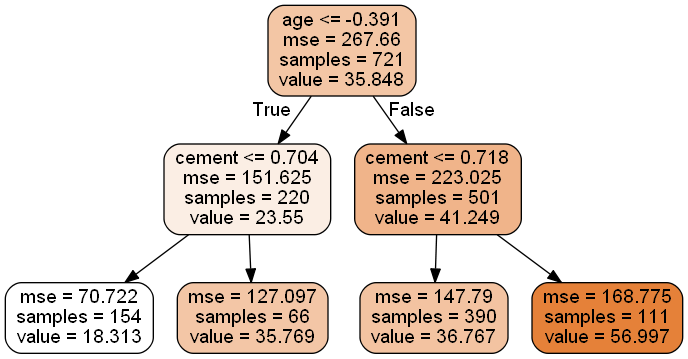

In [169]:
dot_data=StringIO()
export_graphviz(dt,out_file=dot_data,filled=True,rounded=True,
                feature_names=x.columns)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [101]:
def gen_poly(model_name,model,x_train,x_test,y_train,y_test):
    y_train_pre=model.predict(x_train)
    rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
    resqr=round(r2_score(y_train,y_train_pre)*100,2)
    
    print("ModelName",model_name)
    print('-'*40)
    print('RMSE is :',rmse)
    print('R-SQR is :' ,str(resqr)+'%')
    print('\n')
    
    y_train_pre=model.predict(x_test)
    rmse=np.sqrt(mean_squared_error(y_test,y_train_pre))
    resqr=round(r2_score(y_test,y_train_pre)*100,2)
    
    print("ModelName",model_name)
    print('-'*40)
    print('RMSE is :',rmse)
    print('R-SQR is :' ,str(resqr)+'%')

In [102]:
gen_poly("DecisionTreeRegressor",lr,x_train,x_test,y_train,y_test)

ModelName DecisionTreeRegressor
----------------------------------------
RMSE is : 0.21448966400911706
R-SQR is : 99.98%


ModelName DecisionTreeRegressor
----------------------------------------
RMSE is : 6.894484287632674
R-SQR is : 84.41%


In [103]:
random_re = pd.DataFrame({'Algorithm':['DecisionTreeRegressor'],'accuracy':84.41},index={'5'})
results = pd.concat([results,random_re])
results = results[['Algorithm','accuracy']]
results

Algorithm   accuracy
1          Random Forest   0.898727
2   Random Forest K_fold  90.490000
3                  Lasso  63.070000
4                  Ridge  63.780000
5  DecisionTreeRegressor  84.410000

Here we got the 84% accuracy in DecisionTreeRegressor. This Algorithm also performing well but not good as RandomForest_Kfold

# KNeighborsRegressor Algorithm
K-Nearest Neighbors or KNN is a supervised machine learning algorithm and it can be used for classification and regression problems. KNN utilizes the entire dataset. Based on k neighbors value and distance calculation method (Minkowski, Euclidean, etc.), the model predicts the elements. The KNN regressor uses a mean or median value of k neighbors to predict the target element.

In [104]:
KNN=KNeighborsRegressor()

In [105]:
KNN=KNN.fit(x_train,y_train)

In [106]:
def gen_poly(model_name,model,x_train,x_test,y_train,y_test):
    y_train_pre=model.predict(x_train)
    rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
    resqr=round(r2_score(y_train,y_train_pre)*100,2)
    
    print("ModelName",model_name)
    print('-'*40)
    print('RMSE is :',rmse)
    print('R-SQR is :' ,str(resqr)+'%')
    print('\n')
    
    y_train_pre=model.predict(x_test)
    rmse=np.sqrt(mean_squared_error(y_test,y_train_pre))
    resqr=round(r2_score(y_test,y_train_pre)*100,2)
    
    print("ModelName",model_name)
    print('-'*40)
    print('RMSE is :',rmse)
    print('R-SQR is :' ,str(resqr)+'%')

In [107]:
gen_poly('KNeighborsRegressor',KNN,x_train,x_test,y_train,y_test)

ModelName KNeighborsRegressor
----------------------------------------
RMSE is : 7.136070765398194
R-SQR is : 80.97%


ModelName KNeighborsRegressor
----------------------------------------
RMSE is : 8.737435778774753
R-SQR is : 74.95%


In [108]:
random_re = pd.DataFrame({'Algorithm':['KNeighborsRegressor'],'accuracy':74.95},index={'6'})
results = pd.concat([results,random_re])
results = results[['Algorithm','accuracy']]
results

Algorithm   accuracy
1          Random Forest   0.898727
2   Random Forest K_fold  90.490000
3                  Lasso  63.070000
4                  Ridge  63.780000
5  DecisionTreeRegressor  84.410000
6    KNeighborsRegressor  74.950000

Here we are getting the 74% accuracy in KNeighborsRegressor. This Algorithm is also not performing well.
we'll focus on any parameters 

In [109]:
k=20

kfold = KFold(n_splits=k,random_state=70,shuffle=True)
knn_results = cross_val_score(KNN,x,y,cv=kfold)
knn_accuracy = np.mean(abs(knn_results))
knn_accuracy

0.7286497796111487

In [110]:
random_re = pd.DataFrame({'Algorithm':['KNN_KFOLD'],'accuracy':72.86},index={'7'})
results = pd.concat([results,random_re])
results = results[['Algorithm','accuracy']]
results

Algorithm   accuracy
1          Random Forest   0.898727
2   Random Forest K_fold  90.490000
3                  Lasso  63.070000
4                  Ridge  63.780000
5  DecisionTreeRegressor  84.410000
6    KNeighborsRegressor  74.950000
7              KNN_KFOLD  72.860000

Here we are getting only 72%accuracy. we used parameters then also. But accuracy reduced to 2%.<br>So, without parameters only our model performing well

# Support Vector Machine (SVM)
SVM algorithm can perform really well with both linearly separable and non-linearly separable datasets. Even with a limited amount of data, the support vector machine algorithm does not fail to show its magic.

Advantages of Support Vector Machine (SVM)

1. Regularization capabilities: SVM has L2 Regularization feature. So, it has good generalization capabilities which prevent it from over-fitting.<br>

2. Handles non-linear data efficiently: SVM can efficiently handle non-linear data using Kernel trick.<br>

3. Solves both Classification and Regression problems: SVM can be used to solve both classification and regression problems. SVM is used for classification problems while SVR (Support Vector Regression) is used for regression problems.<br>

4. Stability: A small change to the data does not greatly affect the hyperplane and hence the SVM. So the SVM model is stable.<br>

In [111]:
SVM=SVR(
    
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    tol=0.001,
    C=1.0,
    epsilon=0.1,
    shrinking=True,
    cache_size=200,
    verbose=False,
    max_iter=-1,
)

In [112]:
SVM=SVM.fit(x_train,y_train)

In [113]:
def gen_poly(model_name,model,x_train,x_test,y_train,y_test):
    y_train_pre=model.predict(x_train)
    rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
    resqr=round(r2_score(y_train,y_train_pre)*100,2)
    
    print("ModelName",model_name)
    print('-'*40)
    print('RMSE is :',rmse)
    print('R-SQR is :' ,str(resqr)+'%')
    print('\n')
    
    y_train_pre=model.predict(x_test)
    rmse=np.sqrt(mean_squared_error(y_test,y_train_pre))
    resqr=round(r2_score(y_test,y_train_pre)*100,2)
    
    print("ModelName",model_name)
    print('-'*40)
    print('RMSE is :',rmse)
    print('R-SQR is :' ,str(resqr)+'%')

In [114]:
gen_poly("SVM",SVM,x_train,x_test,y_train,y_test)

ModelName SVM
----------------------------------------
RMSE is : 9.869038436713376
R-SQR is : 63.61%


ModelName SVM
----------------------------------------
RMSE is : 10.685311182224106
R-SQR is : 62.54%


In [115]:
random_re = pd.DataFrame({'Algorithm':['SVM'],'accuracy':62.54},index={'8'})
results = pd.concat([results,random_re])
results = results[['Algorithm','accuracy']]
results

Algorithm   accuracy
1          Random Forest   0.898727
2   Random Forest K_fold  90.490000
3                  Lasso  63.070000
4                  Ridge  63.780000
5  DecisionTreeRegressor  84.410000
6    KNeighborsRegressor  74.950000
7              KNN_KFOLD  72.860000
8                    SVM  62.540000

Here we are getting the 62% accuracy. This Algorithm is also not Performing well compared to other Algorithms.<br>
Let's see with cross-validation


In [116]:
k=20

kfold = KFold(n_splits=k,random_state=70,shuffle=True)
knn_results = cross_val_score(SVM,x,y,cv=kfold)
knn_accuracy = np.mean(abs(knn_results))
knn_accuracy

0.6635170398171442

In [117]:
random_re = pd.DataFrame({'Algorithm':['SVM_KFOLD'],'accuracy':66.35},index={'9'})
results = pd.concat([results,random_re])
results = results[['Algorithm','accuracy']]
results

Algorithm   accuracy
1          Random Forest   0.898727
2   Random Forest K_fold  90.490000
3                  Lasso  63.070000
4                  Ridge  63.780000
5  DecisionTreeRegressor  84.410000
6    KNeighborsRegressor  74.950000
7              KNN_KFOLD  72.860000
8                    SVM  62.540000
9              SVM_KFOLD  66.350000

 Here we are getting the 66% accuracy_score before we got 62.Now 4% accuracy_score increased,<br> but our algorithm is not performing well.So Random Forest K_fold performing very well in our dataframe.

In [175]:
dd=DecisionTreeRegressor(criterion='mse',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    ccp_alpha=0.0,
)

In [176]:
ll=dd.fit(x_train,y_train)

In [177]:
def gen_poly(model_name,model,x_train,x_test,y_train,y_test):
    y_train_pre=model.predict(x_train)
    rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
    resqr=round(r2_score(y_train,y_train_pre)*100,2)
    
    print("ModelName",model_name)
    print('-'*40)
    print('RMSE is :',rmse)
    print('R-SQR is :' ,str(resqr)+'%')
    print('\n')
    
    y_train_pre=model.predict(x_test)
    rmse=np.sqrt(mean_squared_error(y_test,y_train_pre))
    resqr=round(r2_score(y_test,y_train_pre)*100,2)
    
    print("ModelName",model_name)
    print('-'*40)
    print('RMSE is :',rmse)
    print('R-SQR is :' ,str(resqr)+'%')

In [178]:
gen_poly("dc",ll,x_train,x_test,y_train,y_test)

ModelName dc
----------------------------------------
RMSE is : 0.21448966400911706
R-SQR is : 99.98%


ModelName dc
----------------------------------------
RMSE is : 6.745670253173644
R-SQR is : 85.07%


In [179]:
random_re = pd.DataFrame({'Algorithm':['DecisionTreeRegressor'],'accuracy':85.07},index={'10'})
results = pd.concat([results,random_re])
results = results[['Algorithm','accuracy']]
results

Algorithm   accuracy
1           Random Forest   0.898727
2    Random Forest K_fold  90.490000
3                   Lasso  63.070000
4                   Ridge  63.780000
5   DecisionTreeRegressor  84.410000
6     KNeighborsRegressor  74.950000
7               KNN_KFOLD  72.860000
8                     SVM  62.540000
9               SVM_KFOLD  66.350000
10  DecisionTreeRegressor  85.070000

 Here we are getting the 85% accuracy_score before we got 84.Now 1% accuracy_score increased,<br> So, our algorithm is  performing well.

# CONCLUSION:-

We did almost 10 models but we are getting the best score in Random Forest K_fold.<br>
In DecisionTreeRegressor also we got the 84% and 85% accuracy_score.DecisionTreeRegressor Algorithm also peroforming well
and remaining Algorithm is not performing well.
Random forest algorithm works very well on this dataset.

Random forest adds additional randomness to the model, while growing the trees. Instead of searching for the most important feature while splitting a node, it searches for the best feature among a random subset of features. This results in a wide diversity that generally results in a better model.

Some of the adavantage of random forest

-It reduces overfitting in decision trees and helps to improve the accuracy -It is flexible to both classification and regression problems -It works well with both categorical and continuous values -It automates missing values present in the data -Normalising of data is not required as it uses a rule-based approach.


# So we'll talk litter bit more about Random Forest and DecisionTreeRegressor Algorithms.

# RandomForest Regression Algorithm

Random forest is one of the most widely used machine learning algorithms in real production settings.

1. Introduction to random forest regression
Random forest is one of the most popular algorithms for regression problems (i.e. predicting continuous outcomes) because of its simplicity and high accuracy. In this guide, we’ll give you a gentle introduction to random forest and the reasons behind its high popularity.

1.1 How would random forest be described in layman’s terms?
Let’s start with an actual problem. Imagine you want to buy real estate, and you want to figure out what comprises a good deal so that you don’t get taken advantage of.

The obvious thing to do would be to look at historic prices of houses sold in the area, then create some kind of decision criteria to summarize the average selling prices given the real-estate specification. You can use the decision chart to evaluate whether the listed price for the apartment you are considering is a bargain or not. It could look like this:




The chart represents a decision tree through a series of yes/no questions, which lead you from the real-estate description (“3 bedrooms”) to its historic average price. You can use the decision tree to predict what the expected price of a real estate would be, given its attributes.

However, you could come up with a distinctly different decision tree structure:

# DecisionTreeRegressor Algorithm

A decision tree is arriving at an estimate by asking a series of questions to the data, each question narrowing our possible values until the model get confident enough to make a single prediction. The order of the question as well as their content are being determined by the model. In addition, the questions asked  are all in a True/False form.

This is a little tough to grasp because it is not how humans naturally think, and perhaps the best way to show this difference is to create a real decision tree from. In the above problem x1, x2 are two features which allow us to make predictions for the target variable y by asking True/False questions.


For each True and False answer there are separate branches. No matter the answers to the questions, we eventually reach a prediction (leaf node). Start at the root node at the top and progress through the tree answering the questions along the way. So given any pair of X1, X2.

One aspect of the decision tree I should mention is how it actually learns (how the ‘questions’ are formed and how the thresholds are set). As a supervised machine learning model, a decision tree learns to map data to outputs in what is called the training phase of model building.



# Over-All Report for the data

In [8]:
profile=ProfileReport(df)
profile

# Thank to Innomatics Research Lab.